# Linear Models and Interpretability

## TODO

Tasks: 
- Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met. 
- Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.
- Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.
- Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model. 
- Model Comparison: Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.

Rubric:
- Notebook is well documented and includes details and references to the dataset and models used
- Assumptions are evaluated with exploratory data analysis and explained in markdown inside the notebook
- Code implementing the linear regression model is correct
- Code implementing the linear regression model is clear and well documented
- Linear regression model is interpreted appropriately and interpretation is discussed in markdown
- Code implementing the logistic regression model is correct
- Code implementing the logistic regression model is clear and well documented
- Logistic regression model is interpreted appropriately and interpretation is discussed in markdown
- Code implementing the GAM is correct
- Code implementing the GAM is clear and well documented
- GAM is interpreted appropriately and interpretation is discussed in markdown
- A discussion of the strengths and weaknesses of each approach is included in markdown
- Recommendations for which model(s) the telecommunications company should use to address their customer churn problem are provided and explained in markdown


## Exploratory Data Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

### Retrieve Dataset

The target of the analysis is the Kaggle Telco Customer Churn dataset (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data). First, we'll retrieve and validate. 

In [3]:
# NOTE: this cell straight from the Kaggle project
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

/Users/jason/Local/school/590/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/jason/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [4]:
!ls $path

WA_Fn-UseC_-Telco-Customer-Churn.csv


In [5]:
df = pd.read_csv(path + f"/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Characterize Predictors

Next we'll inspect the predictor variables and characterize their distribution as well as their relationship to one another. 

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
len(df.columns)

21

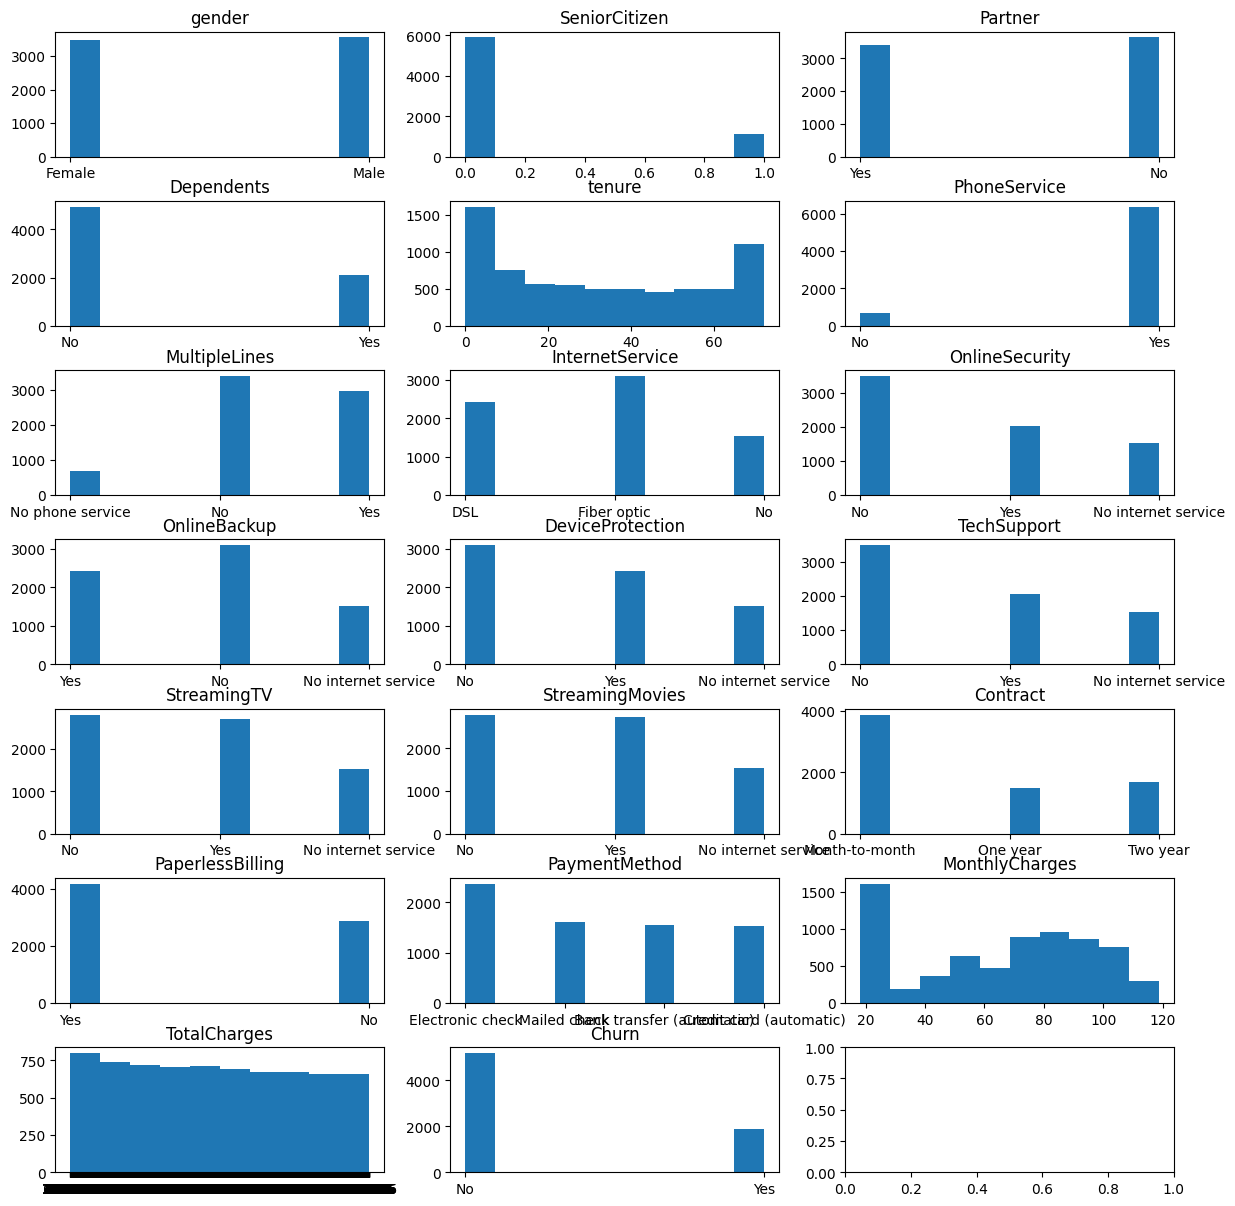

In [49]:
# Plot the distribution of all variables, minus the customer ID, which is a unique identifier
features = df.columns[1:]
h = 7
w = 3
fig, axs = plt.subplots(h,w, figsize=(12,12))
fig.tight_layout()
for i, feature in enumerate(features): 
     row = i // w
     col = i % w
     axs[row, col].hist(df[feature])
     axs[row, col].set_title(feature)
     
plt.show()
     

**Linearity Check** 

Inspect the predictors' relationship with the target

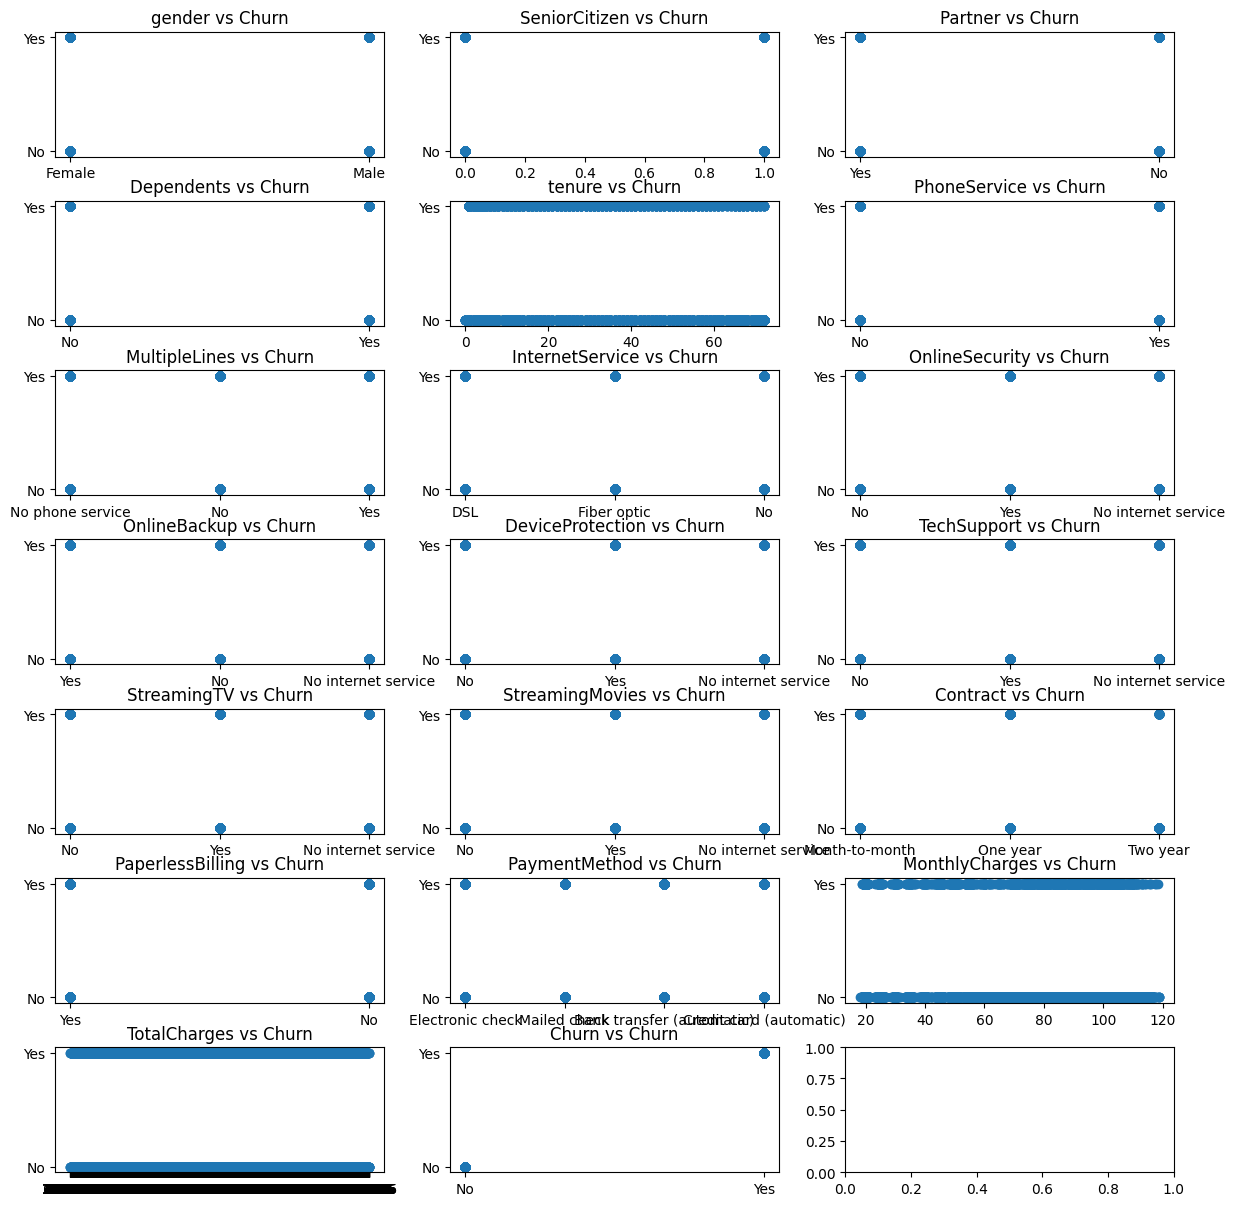

In [50]:
features = df.columns[1:]
target = "Churn"
h = 7
w = 3
fig, axs = plt.subplots(h,w, figsize=(12,12))
fig.tight_layout()
for i, feature in enumerate(features): 
     row = i // w
     col = i % w
     axs[row, col].scatter(x=df[feature], y=df[target])
     axs[row, col].set_title(f"{feature} vs {target}")
     
plt.show()
     

The only linear relationship that's evident here is between churn and itself, no intervention appears to be necessary here.

**Independence** 

## Modeling

### Linear Regression

### Logistic Regression 

### Generalized Additive Model 

### Comparison of Models